# Machine Learning Analysis

- Gabriel Wendell Celestino Rocha
- Leonardo Andrade de Almeida

---

## 0. Setup

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties

from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

- ### Aesthetic Functions

In [4]:
%matplotlib inline

cm_font = FontProperties(fname  = 'CutiveMono-Regular.ttf')
gs_font = FontProperties(fname  = 'GillSans-Light.otf')
cm_size = 20


###############
# SINGLE PLOT #
###############
def sm_plot(grid = True, dark_background = False, use_tex = False, font_family = 'monospace', font_size = 15, 
            minorticks = True, major_ticks = True, minor_ticks = True, grid_linestyle = ':', grid_color = '0.50', 
            tick_length_minor = 5, tick_width_minor = 1, tick_length_major = 8, tick_width_major = 1, labelsize = 15):
    """
    Function to improve the aesthetics of Matplotlib graphs.
    """
    if dark_background:
        plt.style.use('dark_background')
    
    if grid:
        plt.grid(True, linestyle = grid_linestyle, color = grid_color, zorder = 0)
    else:
        plt.grid(False)
    
    plt.rcParams['text.usetex'] = use_tex
    plt.rcParams['font.family'] = font_family
    plt.rcParams['font.size'] = font_size
    
    if minorticks:
        plt.minorticks_on()
    else:
        plt.minorticks_off()
    
    if minor_ticks:
        plt.tick_params(axis = 'both', which = 'minor', direction = "in", 
                        top = True, right = True, length = tick_length_minor, 
                        width = tick_width_minor, labelsize = labelsize)
    
    if major_ticks:
        plt.tick_params(axis = 'both', which = 'major', direction = "in", 
                        top = True, right = True, length = tick_length_major, 
                        width = tick_width_major, labelsize = labelsize)
        
        
# ----------------------------------------------------------------------------------------------------------


###############
## PLOT AXES ##
###############
def sm_plot_mod(ax, grid = True, dark_background = False, use_tex = False, font = 'monospace', font_size = 15, 
                minor_ticks = True, minor_tick_params = True, major_tick_params = True):
    
    if dark_background:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')

    ax.grid(grid, linestyle = ':', color = '0.50')
    
    plt.rcParams['font.family'] = font
    plt.rcParams['font.size'] = font_size
    
    plt.rcParams['text.usetex'] = use_tex
    
    if minor_ticks:
        ax.minorticks_on()
    else:
        ax.minorticks_off()

    if minor_tick_params:
        ax.tick_params(axis = 'both', which = 'minor', direction = "in", 
                       top = True, right = True, length = 5, width = 1, labelsize = font_size)

    if major_tick_params:
        ax.tick_params(axis = 'both', which = 'major', direction = "in", 
                       top = True, right = True, length = 8, width = 1, labelsize = font_size)

---

## 1. Loading data

The master dataframe consists of the union of the two datasets presented above. It is also important to reorganize the data so that it is indexed based on the galaxy analyzed (NGC number). The base-$10\log$ of the period for each Cepheid is also calculated.

In [5]:
data_path = '../data/'
df_path = data_path + 'R11treat.dat'

df = pd.read_csv(df_path, sep = '	', skiprows = 8)
print('DATAFRAME MASTER =D')
display(df)

print('---------------------')
print('  SHAPE =', df.shape)
print('---------------------')

info_path = data_path + 'R11treat_info.txt'

with open(info_path, 'r') as file:
    info = file.read()

print(info)

DATAFRAME MASTER =D


,id,gal,z,dL,M,Merr,m,merr,P,logP,logO_H,bias,Pivot
0,27185,4536,0.006031,25.847143,-7.549763,0.31,24.5123,0.31,13.000,1.113943,-3.46,0.13,1.474125
1,42353,4536,0.006031,25.847143,-6.071363,0.74,25.9907,0.74,13.070,1.116276,-3.03,0.37,1.474125
2,50718,4536,0.006031,25.847143,-7.912863,0.42,24.1492,0.42,13.730,1.137671,-3.36,0.28,1.474125
3,72331,4536,0.006031,25.847143,-7.586963,0.44,24.4751,0.44,13.910,1.143327,-3.19,0.22,1.474125
4,65694,4536,0.006031,25.847143,-7.203863,0.38,24.8582,0.38,14.380,1.157759,-3.10,0.39,1.474125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,29163,4258,0.001494,6.402857,-4.879869,0.57,24.1520,0.57,6.739,0.828595,-3.25,0.38,1.474125
642,34729,4258,0.001494,6.402857,-6.371069,0.50,22.6608,0.50,14.920,1.173769,-3.25,0.00,1.474125
643,89375,4258,0.001494,6.402857,-6.619069,0.45,22.4128,0.45,12.380,1.092721,-3.11,0.42,1.474125
644,246695,4258,0.001494,6.402857,-6.434969,0.40,22.5969,0.40,11.200,1.049218,-3.11,0.49,1.474125


---------------------
  SHAPE = (646, 13)
---------------------

# R11treat.dat
#
# This is a processed and treated version of the Cepheid and redshift datas from R11.
# (Riess et al. 2011 [R11], ApJ, 730, 119, Table 2)
#
# Columns:
#      id: the ID of the cepheid
#     gal: the NGC number of the host galaxy
#       z: redshift of the host galaxy
#      dL: the distance computed via Hubble's law
#       M: abs mags M are computed using M = m + 5*log10(dL/Mpc) + 25
#    Merr: abs mags errs are just the mags m errs
#       m: mags m are computed using m = F160W - 0.41*(V_I)
#    merr: mag errs are just those in the F160W mags
#          (errors in V-I were not given in R11)
#       P: period P is in days (errors in the Period were not given)
#    logP: base-10log of the period for each Cepheid
#  logO_H: this is actually log[O/H], not 12 + log[O/H] as in R11
#    bias: this is the crowding bias *already applied* by R11
#
# Notes:
# - cepheid with id 102255 was excluded since its mag err

---

## 2. Ridge & Lasso Regression

In [65]:
# Extract features and target variable
X = df[['logP', 'logO_H']]   # Features
y = df['M']                  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [66]:
# Ridge Regression
ridge_model = Ridge(alpha = 1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha = 0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [67]:
# Evaluate Ridge Model
print("RIDGE REGRESSION")
print(f"- Coefficients = {ridge_model.coef_}")
print(f"- Intercept = {ridge_model.intercept_}")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_ridge)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_ridge)}")

# Evaluate Lasso Model
print("\nLASSO REGRESSION")
print(f"- Coefficients = {lasso_model.coef_}")
print(f"- Intercept = {lasso_model.intercept_}")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_lasso)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_lasso)}")

RIDGE REGRESSION
- Coefficients = [-2.96652633 -0.08325648]
- Intercept = -3.1542788285542436
- Mean Absolute Error = 0.6539514149635561
- Mean Squared Error = 0.7121209187195398
- Root Mean Squared Error = 0.8438725725603006
- R2 Score = 0.5316350406135235

LASSO REGRESSION
- Coefficients = [-1.73207542 -0.        ]
- Intercept = -4.715953981409658
- Mean Absolute Error = 0.7544516238232355
- Mean Squared Error = 0.8826644631136809
- Root Mean Squared Error = 0.9395022422079049
- R2 Score = 0.41946782554643447


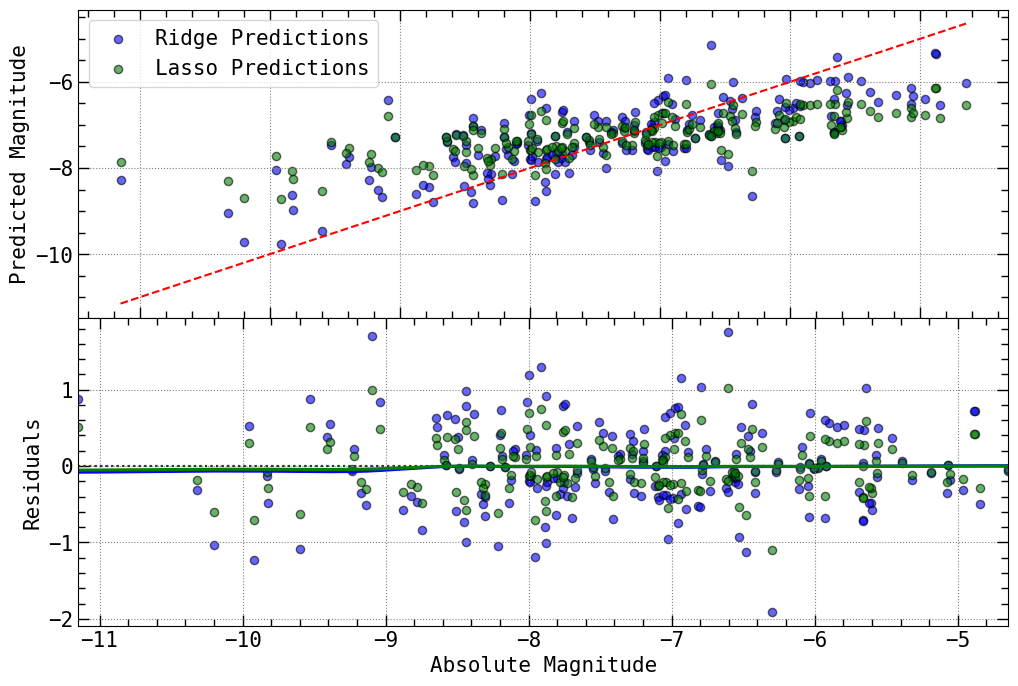

In [79]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_ridge, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'Ridge Predictions')
ax0.scatter(y_test, y_pred_lasso, color = 'g', edgecolors = 'k', s = 35, alpha = 0.6, label = 'Lasso Predictions')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_ridge, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))
ax1 = sns.residplot(x = y_test, y = y_pred_lasso, lowess = True, color = 'g', 
                   scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 3. Decision Tree & Random Forest

In [81]:
# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state = 42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

In [82]:
# Evaluate Decision Tree Model
print("DECISION TREE REGRESSION")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_tree)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_tree)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_tree)}")

# Evaluate Random Forest Model
print("\nRANDOM FOREST REGRESSION")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_forest)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_forest)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_forest))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_forest)}")

DECISION TREE REGRESSION
- Mean Absolute Error = 0.9052202813975975
- Mean Squared Error = 1.3324353403098677
- Root Mean Squared Error = 1.154311630500996
- R2 Score = 0.12365160516353546

RANDOM FOREST REGRESSION
- Mean Absolute Error = 0.7729168377113128
- Mean Squared Error = 0.9593204691147815
- Root Mean Squared Error = 0.9794490640736666
- R2 Score = 0.3690508441130117


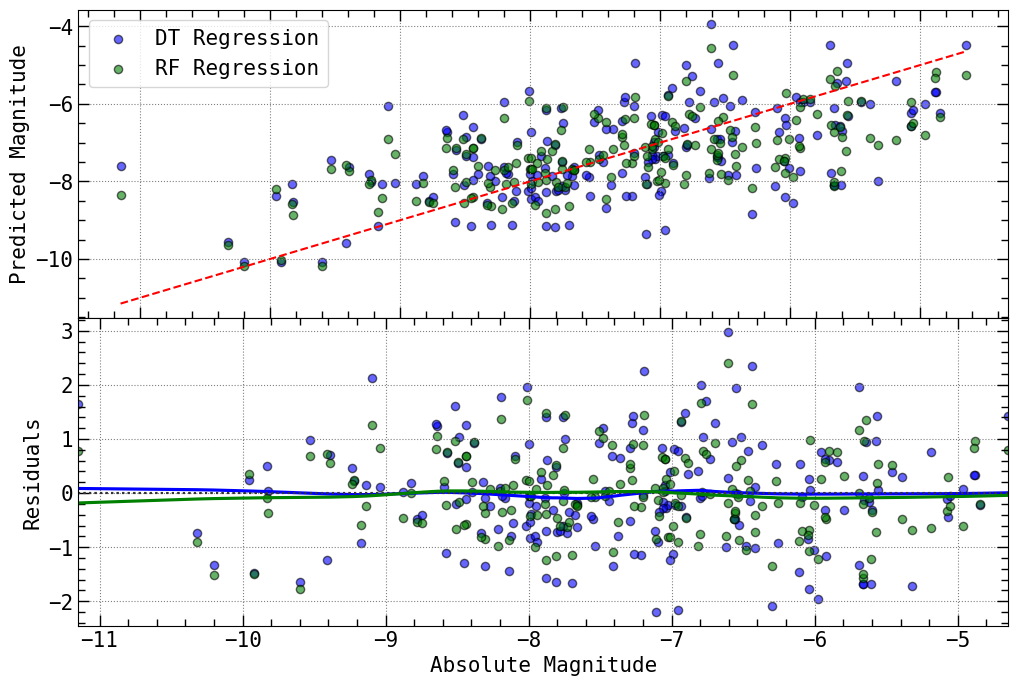

In [84]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_tree, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'DT Regression')
ax0.scatter(y_test, y_pred_forest, color = 'g', edgecolors = 'k', s = 35, alpha = 0.6, label = 'RF Regression')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_tree, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))
ax1 = sns.residplot(x = y_test, y = y_pred_forest, lowess = True, color = 'g', 
                   scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)